In [1]:
# -*- coding:utf-8 -*-

from BayesianNetworks import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#############################
## Example Tests from Bishop `Pattern Recognition and Machine Learning` textbook on page 377
#############################
BatteryState = readFactorTable(['battery'], [0.9, 0.1], [[1, 0]])
FuelState = readFactorTable(['fuel'], [0.9, 0.1], [[1, 0]])
GaugeBF = readFactorTable(['gauge', 'battery', 'fuel'], [0.8, 0.2, 0.2, 0.1, 0.2, 0.8, 0.8, 0.9], [[1, 0], [1, 0], [1, 0]])

carNet = [BatteryState, FuelState, GaugeBF] # carNet is a list of factors 
## Notice that different order of operations give the same answer
## (rows/columns may be permuted)
joinFactors(joinFactors(BatteryState, FuelState), GaugeBF)
joinFactors(joinFactors(GaugeBF, FuelState), BatteryState)

marginalizeFactor(joinFactors(GaugeBF, BatteryState), 'gauge')
joinFactors(marginalizeFactor(GaugeBF, 'gauge'), BatteryState)

joinFactors(marginalizeFactor(joinFactors(GaugeBF, BatteryState), 'battery'), FuelState)
marginalizeFactor(joinFactors(joinFactors(GaugeBF, FuelState), BatteryState), 'battery')

marginalizeFactor(joinFactors(marginalizeFactor(joinFactors(GaugeBF, BatteryState), 'battery'), FuelState), 'gauge')
marginalizeFactor(joinFactors(marginalizeFactor(joinFactors(GaugeBF, BatteryState), 'battery'), FuelState), 'fuel')

evidenceUpdateNet(carNet, 'fuel', '1')
evidenceUpdateNet(carNet, ['fuel', 'battery'], ['1', '0'])

## Marginalize must first combine all factors involving the variable to
## marginalize. Again, this operation may lead to factors that aren't
## probabilities.
marginalizeNetworkVariables(carNet, 'battery') ## this returns back a list
marginalizeNetworkVariables(carNet, 'fuel') ## this returns back a list
marginalizeNetworkVariables(carNet, ['battery', 'fuel'])

# inference
print("inference starts")
print(inference(carNet, ['battery', 'fuel'], [], []) )        ## chapter 8 equation (8.30)
print(inference(carNet, ['battery'], ['fuel'], [0]))           ## chapter 8 equation (8.31)
print(inference(carNet, ['battery'], ['gauge'], [0]))          ##chapter 8 equation  (8.32)
print(inference(carNet, [], ['gauge', 'battery'], [0, 0]))    ## chapter 8 equation (8.33)
print("inference ends")
###########################################################################
#RiskFactor Data Tests
###########################################################################
riskFactorNet = pd.read_csv('RiskFactorsData.csv')

# Create factors

income      = readFactorTablefromData(riskFactorNet, ['income'])
smoke       = readFactorTablefromData(riskFactorNet, ['smoke', 'income'])
exercise    = readFactorTablefromData(riskFactorNet, ['exercise', 'income'])
long_sit    = readFactorTablefromData(riskFactorNet, ['long_sit', 'income'])
stay_up     = readFactorTablefromData(riskFactorNet, ['stay_up', 'income'])
bmi         = readFactorTablefromData(riskFactorNet, ['bmi', 'income']) # --> ['bmi', 'income', 'exercise', 'long_sit'] ?
diabetes    = readFactorTablefromData(riskFactorNet, ['diabetes', 'bmi'])

## you need to create more factor tables


risk_net = [income, smoke, long_sit, stay_up, exercise, bmi, diabetes]
print("income dataframe is ")
print(income) 
factors = riskFactorNet.columns

# example test p(diabetes|smoke=1,exercise=2,long_sit=1)

margVars = list(set(factors) - {'diabetes', 'smoke', 'exercise','long_sit'})
obsVars  = ['smoke', 'exercise','long_sit']
obsVals  = [1, 2, 1]

p = inference(risk_net, margVars, obsVars, obsVals)
print(p)

inference starts
   gauge  probs
0      0  0.315
1      1  0.685
   fuel  gauge  probs
0     0      0   0.81
1     0      1   0.19
   fuel  gauge     probs
0     0      0  0.257143
1     1      0  0.742857
      probs  battery  fuel  gauge
0  0.888889        0     1      0
1  0.111111        0     0      0
inference ends
income dataframe is 
      probs  income
0  0.050848       1
1  0.059429       2
2  0.074042       3
3  0.094414       4
4  0.116356       5
5  0.150725       6
6  0.164430       7
7  0.289755       8
   smoke  long_sit  exercise  diabetes     probs
0      1         1         2         1  0.136815
1      1         1         2         2  0.008916
2      1         1         2         3  0.837218
3      1         1         2         4  0.017052


### Problem 2

First, define a function for `plt.pie`.

In [2]:
# used in plt.pie
def make_autopct(values):
    def my_autopct(pct):
        return '{p:.2f}%'.format(p=pct)
    return my_autopct

Then define a function used for problem 2 and 4.

In [3]:
def Problem2Or4(flag, riskFactorNet, income, smoke, exercise, long_sit, stay_up, bmi, diabetes, bp, cholesterol, stroke, attack, angina):
    def good_or_bad_a(flag, obsVals, riskFactorNet, income, smoke, exercise, long_sit, stay_up, bmi, diabetes, bp, cholesterol, stroke, attack, angina):
        ## 1. Calculate p(diabetes|smoke,exercise,long_sit,stay_up)
        risk_net = [income, smoke, long_sit, stay_up, exercise, bmi, diabetes]
        factors = riskFactorNet.columns

        margVars = list(set(factors) - {'diabetes', 'smoke', 'exercise','long_sit', 'stay_up'})
        obsVars  = ['smoke', 'exercise','long_sit','stay_up']

        p = inference(risk_net, margVars, obsVars, obsVals)
        print(f"p(diabetes|smoke={obsVals[0]}, exercise={obsVals[1]}, long_sit={obsVals[2]}, stay_up={obsVals[3]}):")
        print(p)
        plt.figure()
        plt.pie(p["probs"], labels = p["diabetes"], autopct=make_autopct(p["probs"]))
        plt.title(f"p(diabetes|smoke={obsVals[0]}, exercise={obsVals[1]}, long_sit={obsVals[2]}, stay_up={obsVals[3]})")
        plt.savefig(f"./output/Problem{flag}_p_of_diabetes_GIVEN_smoke_{obsVals[0]}_exercise_{obsVals[1]}_long_sit_{obsVals[2]}_stay_up_{obsVals[3]}.pdf")

        ## 2. Calculate p(stroke|smoke,exercise,long_sit,stay_up)
        risk_net = [income, smoke, long_sit, stay_up, exercise, bmi, bp, cholesterol, stroke]
        factors = riskFactorNet.columns

        margVars = list(set(factors) - {'stroke', 'smoke', 'exercise','long_sit', 'stay_up'})
        obsVars  = ['smoke', 'exercise','long_sit','stay_up']

        p = inference(risk_net, margVars, obsVars, obsVals)
        print(f"p(stroke|smoke={obsVals[0]}, exercise={obsVals[1]}, long_sit={obsVals[2]}, stay_up={obsVals[3]}):")
        print(p)
        plt.figure()
        plt.pie(p["probs"], labels = p["stroke"], autopct=make_autopct(p["probs"]))
        plt.title(f"p(stroke|smoke={obsVals[0]}, exercise={obsVals[1]}, long_sit={obsVals[2]}, stay_up={obsVals[3]})")
        plt.savefig(f"./output/Problem{flag}_p_of_stroke_GIVEN_smoke_{obsVals[0]}_exercise_{obsVals[1]}_long_sit_{obsVals[2]}_stay_up_{obsVals[3]}.pdf")

        ## 3. Calculate p(attack|smoke,exercise,long_sit,stay_up)
        risk_net = [income, smoke, long_sit, stay_up, exercise, bmi, bp, cholesterol, attack]
        factors = riskFactorNet.columns

        margVars = list(set(factors) - {'attack', 'smoke', 'exercise','long_sit', 'stay_up'})
        obsVars  = ['smoke', 'exercise','long_sit','stay_up']

        p = inference(risk_net, margVars, obsVars, obsVals)
        print(f"p(attack|smoke={obsVals[0]}, exercise={obsVals[1]}, long_sit={obsVals[2]}, stay_up={obsVals[3]}):")
        print(p)
        plt.figure()
        plt.pie(p["probs"], labels = p["attack"], autopct=make_autopct(p["probs"]))
        plt.title(f"p(attack|smoke={obsVals[0]}, exercise={obsVals[1]}, long_sit={obsVals[2]}, stay_up={obsVals[3]})")
        plt.savefig(f"./output/Problem{flag}_p_of_attack_GIVEN_smoke_{obsVals[0]}_exercise_{obsVals[1]}_long_sit_{obsVals[2]}_stay_up_{obsVals[3]}.pdf")

        ## 4. Calculate p(angina|smoke,exercise,long_sit,stay_up)
        risk_net = [income, smoke, long_sit, stay_up, exercise, bmi, bp, cholesterol, angina]
        factors = riskFactorNet.columns

        margVars = list(set(factors) - {'angina', 'smoke', 'exercise','long_sit', 'stay_up'})
        obsVars  = ['smoke', 'exercise','long_sit','stay_up']

        p = inference(risk_net, margVars, obsVars, obsVals)
        print(f"p(angina|smoke={obsVals[0]}, exercise={obsVals[1]}, long_sit={obsVals[2]}, stay_up={obsVals[3]}):")
        print(p)
        plt.figure()
        plt.pie(p["probs"], labels = p["angina"], autopct=make_autopct(p["probs"]))
        plt.title(f"p(angina|smoke={obsVals[0]}, exercise={obsVals[1]}, long_sit={obsVals[2]}, stay_up={obsVals[3]})")
        plt.savefig(f"./output/Problem{flag}_p_of_angina_GIVEN_smoke_{obsVals[0]}_exercise_{obsVals[1]}_long_sit_{obsVals[2]}_stay_up_{obsVals[3]}.pdf")
    
    ## (a) Bad habits:
    obsVals = [1, 2, 1, 1]
    good_or_bad_a(flag, obsVals, riskFactorNet, income, smoke, exercise, long_sit, stay_up, bmi, diabetes, bp, cholesterol, stroke, attack, angina)

    ## (a) Good habits:
    obsVals = [2, 1, 2, 2]
    good_or_bad_a(flag, obsVals, riskFactorNet, income, smoke, exercise, long_sit, stay_up, bmi, diabetes, bp, cholesterol, stroke, attack, angina)
    
    def good_or_bad_b(flag, obsVals, riskFactorNet, income, smoke, exercise, long_sit, stay_up, bmi, diabetes, bp, cholesterol, stroke, attack, angina):
        ## 1. Calculate p(diabetes|bp, cholesterol, bmi)
        risk_net = [income, smoke, long_sit, stay_up, exercise, bmi, bp, cholesterol, diabetes]
        factors = riskFactorNet.columns

        margVars = list(set(factors) - {'diabetes', 'bp', 'cholesterol','bmi'})
        obsVars  = ['bp', 'cholesterol', 'bmi']

        p = inference(risk_net, margVars, obsVars, obsVals)
        print(f"p(diabetes|bp={obsVals[0]}, cholesterol={obsVals[1]}, bmi={obsVals[2]}):")
        print(p)
        plt.figure()
        plt.pie(p["probs"], labels = p["diabetes"], autopct=make_autopct(p["probs"]))
        plt.title(f"p(diabetes|bp={obsVals[0]}, cholesterol={obsVals[1]}, bmi={obsVals[2]})")
        plt.savefig(f"./output/Problem{flag}_p_of_diabetes_GIVEN_bp_{obsVals[0]}_cholesterol_{obsVals[1]}_bmi_{obsVals[2]}.pdf")

        ## 2. Calculate p(stroke|bp, cholesterol, bmi)
        risk_net = [income, smoke, long_sit, stay_up, exercise, bmi, bp, cholesterol, stroke]
        factors = riskFactorNet.columns

        margVars = list(set(factors) - {'stroke', 'bp', 'cholesterol','bmi'})
        obsVars  = ['bp', 'cholesterol','bmi']

        p = inference(risk_net, margVars, obsVars, obsVals)
        print(f"p(stroke|bp={obsVals[0]}, cholesterol={obsVals[1]}, bmi={obsVals[2]}):")
        print(p)
        plt.figure()
        plt.pie(p["probs"], labels = p["stroke"], autopct=make_autopct(p["probs"]))
        plt.title(f"p(stroke|bp={obsVals[0]}, cholesterol={obsVals[1]}, bmi={obsVals[2]})")
        plt.savefig(f"./output/Problem{flag}_p_of_stroke_GIVEN_bp_{obsVals[0]}_cholesterol_{obsVals[1]}_bmi_{obsVals[2]}.pdf")

        ## 3. Calculate p(attack|bp, cholesterol, bmi)
        risk_net = [income, smoke, long_sit, stay_up, exercise, bmi, bp, cholesterol, attack]
        factors = riskFactorNet.columns

        margVars = list(set(factors) - {'attack', 'bp', 'cholesterol','bmi'})
        obsVars  = ['bp', 'cholesterol','bmi']

        p = inference(risk_net, margVars, obsVars, obsVals)
        print(f"p(attack|bp={obsVals[0]}, cholesterol={obsVals[1]}, bmi={obsVals[2]}):")
        print(p)
        plt.figure()
        plt.pie(p["probs"], labels = p["attack"], autopct=make_autopct(p["probs"]))
        plt.title(f"p(attack|bp={obsVals[0]}, cholesterol={obsVals[1]}, bmi={obsVals[2]})")
        plt.savefig(f"./output/Problem{flag}_p_of_attack_GIVEN_bp_{obsVals[0]}_cholesterol_{obsVals[1]}_bmi_{obsVals[2]}.pdf")

        ## 4. Calculate p(angina|bp, cholesterol, bmi)
        risk_net = [income, smoke, long_sit, stay_up, exercise, bmi, bp, cholesterol, angina]
        factors = riskFactorNet.columns

        margVars = list(set(factors) - {'angina', 'bp', 'cholesterol','bmi'})
        obsVars  = ['bp', 'cholesterol','bmi']

        p = inference(risk_net, margVars, obsVars, obsVals)
        print(f"p(angina|bp={obsVals[0]}, cholesterol={obsVals[1]}, bmi={obsVals[2]}):")
        print(p)
        plt.figure()
        plt.pie(p["probs"], labels = p["angina"], autopct=make_autopct(p["probs"]))
        plt.title(f"p(angina|bp={obsVals[0]}, cholesterol={obsVals[1]}, bmi={obsVals[2]})")
        plt.savefig(f"./output/Problem{flag}_p_of_angina_GIVEN_bp_{obsVals[0]}_cholesterol_{obsVals[1]}_bmi_{obsVals[2]}.pdf")

    ## (b) Poor health:
    obsVals = [1, 1, 3]
    good_or_bad_b(flag, obsVals, riskFactorNet, income, smoke, exercise, long_sit, stay_up, bmi, diabetes, bp, cholesterol, stroke, attack, angina)
    ## (b) Good health:
    obsVals = [3, 2, 2]
    good_or_bad_b(flag, obsVals, riskFactorNet, income, smoke, exercise, long_sit, stay_up, bmi, diabetes, bp, cholesterol, stroke, attack, angina)

Run problem 2.

p(diabetes|smoke=1, exercise=2, long_sit=1, stay_up=1):
   smoke  long_sit  stay_up  exercise  diabetes     probs
0      1         1        1         2         1  0.179597
1      1         1        1         2         2  0.008754
2      1         1        1         2         3  0.791160
3      1         1        1         2         4  0.020489
p(stroke|smoke=1, exercise=2, long_sit=1, stay_up=1):
   smoke  long_sit  stay_up  exercise  stroke     probs
0      1         1        1         2       1  0.053214
1      1         1        1         2       2  0.946786
p(attack|smoke=1, exercise=2, long_sit=1, stay_up=1):
   smoke  long_sit  stay_up  exercise  attack     probs
0      1         1        1         2       1  0.085704
1      1         1        1         2       2  0.914296
p(angina|smoke=1, exercise=2, long_sit=1, stay_up=1):
   smoke  long_sit  stay_up  exercise  angina    probs
0      1         1        1         2       1  0.09542
1      1         1        1         2       2 

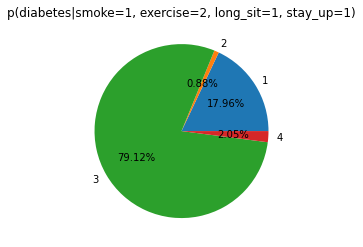

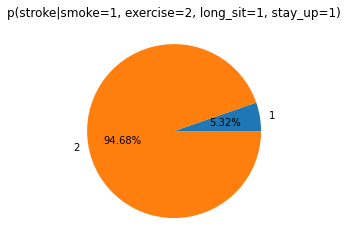

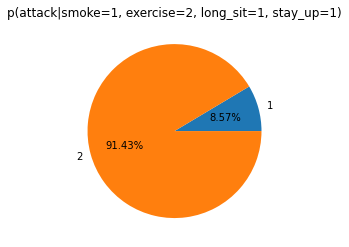

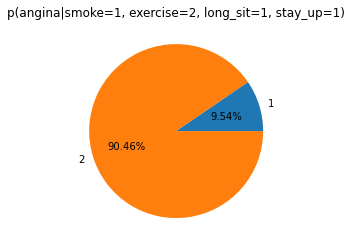

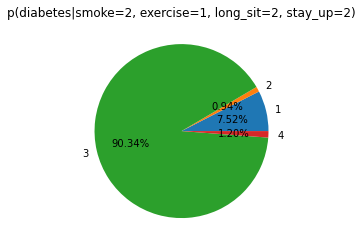

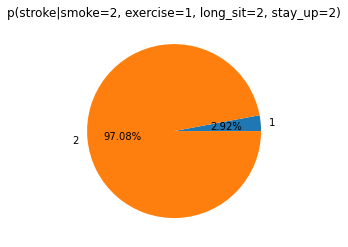

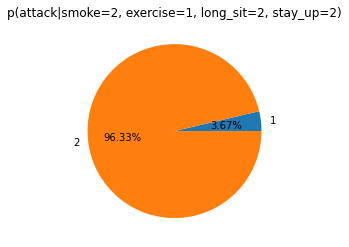

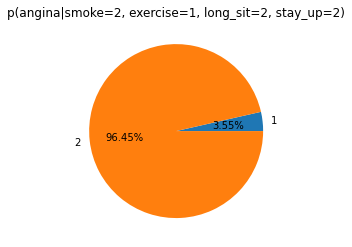

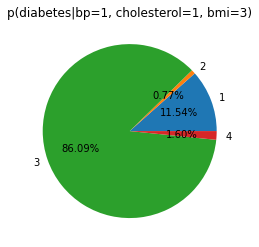

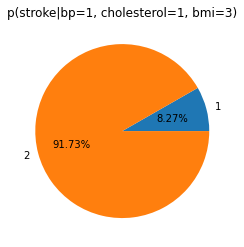

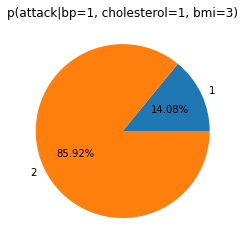

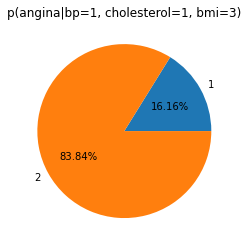

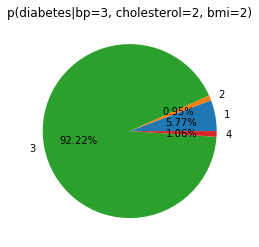

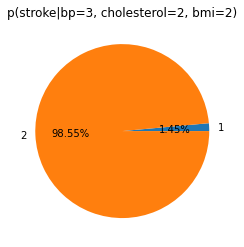

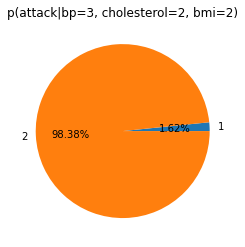

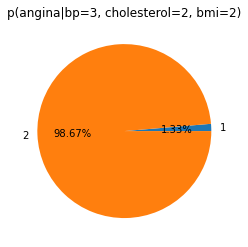

In [4]:
riskFactorNet = pd.read_csv('RiskFactorsData.csv')
income      = readFactorTablefromData(riskFactorNet, ['income'])
smoke       = readFactorTablefromData(riskFactorNet, ['smoke', 'income'])
exercise    = readFactorTablefromData(riskFactorNet, ['exercise', 'income'])
long_sit    = readFactorTablefromData(riskFactorNet, ['long_sit', 'income'])
stay_up     = readFactorTablefromData(riskFactorNet, ['stay_up', 'income'])
bmi         = readFactorTablefromData(riskFactorNet, ['bmi', 'income', 'exercise', 'long_sit'])
diabetes    = readFactorTablefromData(riskFactorNet, ['diabetes', 'bmi'])
bp          = readFactorTablefromData(riskFactorNet, ['bp', 'exercise', 'long_sit', 'income', 'stay_up', 'smoke'])
cholesterol = readFactorTablefromData(riskFactorNet, ['cholesterol', 'exercise', 'stay_up', 'income', 'smoke'])
stroke      = readFactorTablefromData(riskFactorNet, ['stroke', 'bmi', 'bp', 'cholesterol'])
attack      = readFactorTablefromData(riskFactorNet, ['attack', 'bmi', 'bp', 'cholesterol'])
angina      = readFactorTablefromData(riskFactorNet, ['angina', 'bmi', 'bp', 'cholesterol'])

Problem2Or4(2,riskFactorNet, income, smoke, exercise, long_sit, stay_up, bmi, diabetes, bp, cholesterol, stroke, attack, angina)

In [5]:
## Problem 3
## 1. Calculate p(diabetes = 1 | incomes = i)
risk_net = [income, smoke, long_sit, stay_up, exercise, bmi, diabetes] #, bp, cholesterol, stroke, attack, angina]
factors = riskFactorNet.columns

margVars = list(set(factors) - {'diabetes', 'income'})
obsVars  = ['income']

p_diabetes = []
for obsVals in range(1,9):
    p = inference(risk_net, margVars, obsVars, [obsVals])
    p_diabetes.append(p["probs"][0])
print(p_diabetes)

[0.14638068847122615, 0.1432586762786081, 0.1410675956907888, 0.13807894728701736, 0.1360655586215957, 0.1358621033062173, 0.1336807292885273, 0.12328011224922902]


In [6]:
## 2. Calculate p(stroke = 1 | incomes = i)
risk_net = [income, smoke, long_sit, stay_up, exercise, bmi, bp, stroke]
factors = riskFactorNet.columns

margVars = list(set(factors) - {'stroke', 'income'})
obsVars  = ['income']

p_stroke = []
for obsVals in range(1,9):
    p = inference(risk_net, margVars, obsVars, [obsVals])
    p_stroke.append(p["probs"][0])
print(p_stroke)

[0.04892434305879075, 0.04995396050623709, 0.048230842466152675, 0.04653921801247464, 0.04480963220645973, 0.04227767009164607, 0.039274531714608596, 0.03552671690636238]


In [7]:
## 3. Calculate p(attack = 1 | incomes = i)
risk_net = [income, smoke, long_sit, stay_up, exercise, bmi, bp, attack]
factors = riskFactorNet.columns

margVars = list(set(factors) - {'attack', 'income'})
obsVars  = ['income']

p_attack = []
for obsVals in range(1,9):
    p = inference(risk_net, margVars, obsVars, [obsVals])
    p_attack.append(p["probs"][0])
print(p_attack)

[0.07270109725036378, 0.07421830724777523, 0.0719534502876385, 0.06963040473524817, 0.06735829020463868, 0.06404813681246686, 0.05991243002058232, 0.054473993253372176]


In [8]:
## 4. Calculate p(angina = 1 | incomes = i)
risk_net = [income, smoke, long_sit, stay_up, exercise, bmi, bp, angina]
factors = riskFactorNet.columns

margVars = list(set(factors) - {'angina', 'income'})
obsVars  = ['income']

p_angina = []
for obsVals in range(1,9):
    p = inference(risk_net, margVars, obsVars, [obsVals])
    p_angina.append(p["probs"][0])
print(p_angina)

[0.0783936144557599, 0.08004870074651131, 0.07746007343753715, 0.07478162454261576, 0.07218385616726211, 0.0684358288281692, 0.06373999929896233, 0.0574673686112739]


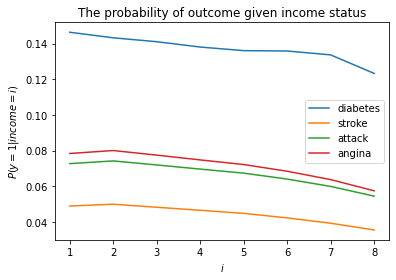

In [9]:
## plot
plt.figure()
plt.plot(list(range(1,9)), p_diabetes, label="diabetes")
plt.plot(list(range(1,9)), p_stroke, label="stroke")
plt.plot(list(range(1,9)), p_attack, label="attack")
plt.plot(list(range(1,9)), p_angina, label="angina")
plt.legend()
plt.xlabel(r"$i$")
plt.ylabel(r"$P(y=1|income=i)$")
plt.title("The probability of outcome given income status")
plt.savefig("./output/Problem3.pdf")

p(diabetes|smoke=1, exercise=2, long_sit=1, stay_up=1):
   smoke  long_sit  stay_up  exercise  diabetes     probs
0      1         1        1         2         1  0.245991
1      1         1        1         2         2  0.006928
2      1         1        1         2         3  0.723722
3      1         1        1         2         4  0.023359
p(stroke|smoke=1, exercise=2, long_sit=1, stay_up=1):
   smoke  long_sit  stay_up  exercise  stroke     probs
0      1         1        1         2       1  0.080488
1      1         1        1         2       2  0.919512
p(attack|smoke=1, exercise=2, long_sit=1, stay_up=1):
   smoke  long_sit  stay_up  exercise  attack     probs
0      1         1        1         2       1  0.135301
1      1         1        1         2       2  0.864699
p(angina|smoke=1, exercise=2, long_sit=1, stay_up=1):
   smoke  long_sit  stay_up  exercise  angina     probs
0      1         1        1         2       1  0.138072
1      1         1        1         2       

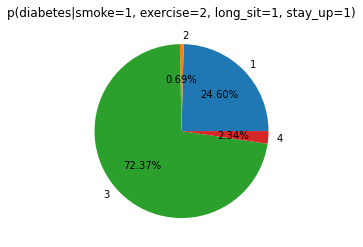

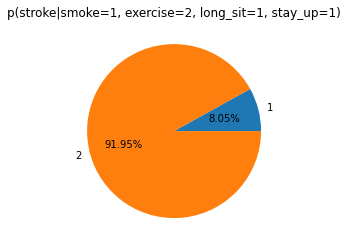

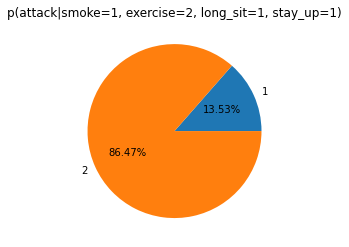

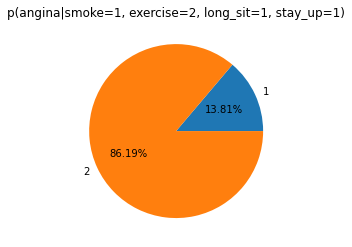

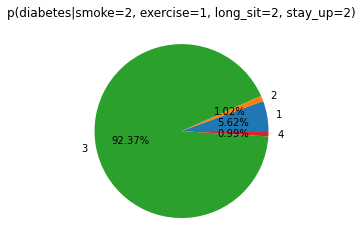

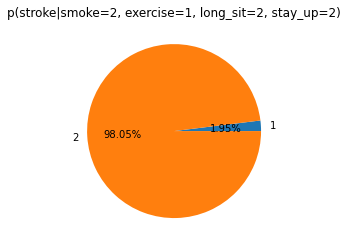

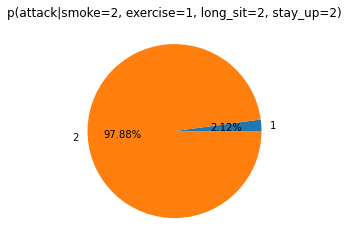

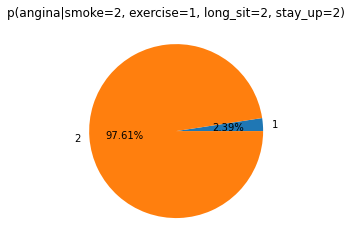

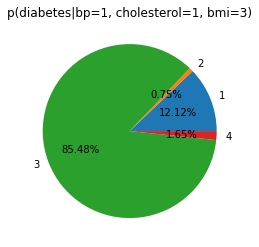

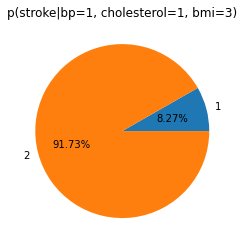

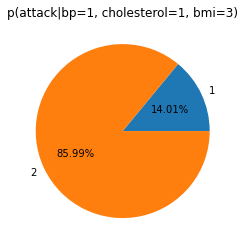

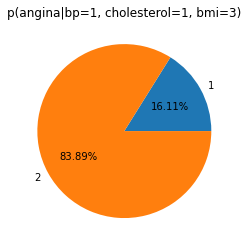

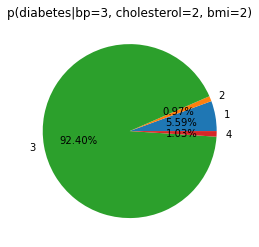

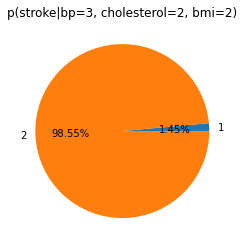

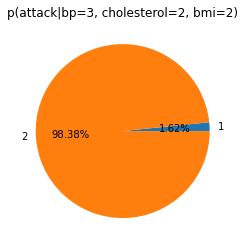

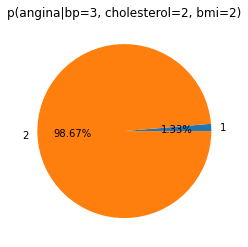

In [10]:
## Problem 4
income      = readFactorTablefromData(riskFactorNet, ['income'])
smoke       = readFactorTablefromData(riskFactorNet, ['smoke', 'income'])
exercise    = readFactorTablefromData(riskFactorNet, ['exercise', 'income'])
long_sit    = readFactorTablefromData(riskFactorNet, ['long_sit', 'income'])
stay_up     = readFactorTablefromData(riskFactorNet, ['stay_up', 'income'])
bmi         = readFactorTablefromData(riskFactorNet, ['bmi', 'income', 'exercise', 'long_sit'])
diabetes    = readFactorTablefromData(riskFactorNet, ['diabetes', 'bmi', 'smoke', 'exercise']) # add 'smoke' and 'exercise'
bp          = readFactorTablefromData(riskFactorNet, ['bp', 'exercise', 'long_sit', 'income', 'stay_up', 'smoke'])
cholesterol = readFactorTablefromData(riskFactorNet, ['cholesterol', 'exercise', 'stay_up', 'income', 'smoke'])
stroke      = readFactorTablefromData(riskFactorNet, ['stroke', 'bmi', 'bp', 'cholesterol', 'smoke', 'exercise']) # add 'smoke' and 'exercise'
attack      = readFactorTablefromData(riskFactorNet, ['attack', 'bmi', 'bp', 'cholesterol', 'smoke', 'exercise']) # add 'smoke' and 'exercise'
angina      = readFactorTablefromData(riskFactorNet, ['angina', 'bmi', 'bp', 'cholesterol', 'smoke', 'exercise']) # add 'smoke' and 'exercise'

Problem2Or4(4, riskFactorNet, income, smoke, exercise, long_sit, stay_up, bmi, diabetes, bp, cholesterol, stroke, attack, angina)

In [11]:
## Problem 5

## 1. Calculate p(stroke = 1 | diabetes = 1) and p(stroke = 1 | diabetes = 3) with the nerwork in problem 4.
risk_net = [income, smoke, long_sit, stay_up, exercise, bmi, diabetes, bp, cholesterol, stroke]
factors = riskFactorNet.columns

margVars = list(set(factors) - {'stroke','diabetes'})
obsVars  = ['diabetes']

obsVals  = [1]
p = inference(risk_net, margVars, obsVars, obsVals)
print("p(stroke = 1 | diabetes = 1) with the network in problem 4:")
print(p["probs"][0])

obsVals  = [3]
p = inference(risk_net, margVars, obsVars, obsVals)
print("p(stroke = 1 | diabetes = 3) with the network in problem 4:")
print(p["probs"][0])

p(stroke = 1 | diabetes = 1) with the network in problem 4:
0.04441718130847404
p(stroke = 1 | diabetes = 3) with the network in problem 4:
0.03995473229116679


In [12]:
## 2. Calculate p(stroke = 1 | diabetes = 1) and p(stroke = 1 | diabetes = 3) with third network.
stroke      = readFactorTablefromData(riskFactorNet, ['stroke', 'bmi', 'bp', 'cholesterol', 'smoke', 'exercise', 'diabetes'])

risk_net = [income, smoke, long_sit, stay_up, exercise, bmi, diabetes, bp, cholesterol, stroke]
factors = riskFactorNet.columns

margVars = list(set(factors) - {'stroke','diabetes'})
obsVars  = ['diabetes']

obsVals  = [1]
p = inference(risk_net, margVars, obsVars, obsVals)
print("p(stroke = 1 | diabetes = 1) with third network:")
print(p["probs"][0])

obsVals  = [3]
p = inference(risk_net, margVars, obsVars, obsVals)
print("p(stroke = 1 | diabetes = 3) with third network:")
print(p["probs"][0])

p(stroke = 1 | diabetes = 1) with third network:
0.07654239679086355
p(stroke = 1 | diabetes = 3) with third network:
0.03445613485993901
